# Импорт данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# sns.set(style="darkgrid")
plt.style.use('ggplot')

In [ ]:
!gdown --id 1o4RcMePzYQm5Ox8qjaWBGBnjfwyespVD

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1o4RcMePzYQm5Ox8qjaWBGBnjfwyespVD
To: /content/HH_EDA.xlsx
100% 1.35M/1.35M [00:00<00:00, 73.9MB/s]


In [ ]:
df = pd.read_excel('/content/HH_EDA.xlsx')

# Удаление выбросов

Вычисляю 1й и 3й квартиль, затем выбросы. Таже удаляю ошибочные данные, в которых заработная плата меньше 5000 рублей

In [ ]:
q1 = df.salary.quantile(0.25)
q3 = df.salary.quantile(0.75)
IQR = q3 - q1
a = q1 - 1.5*IQR
b = q3 + 1.5*IQR
df.salary = df.salary[(df.salary > a) & (df.salary < b) & (df.salary > 5000)]

После этого вместо удаленных значений выбросов появляются значения NaN, 
можно либо удалить строки с данным значением с помощью метода .dropna(axis = 0, inplace = True), 
либо заполнить данные значения с помощью метода .fillna()

Удаляю строки

In [ ]:
df.dropna(axis = 0, inplace = True)

Остается 5812 вакансий из изначально собранных 6245

In [ ]:
len(df)

5812

# Сформулированные гипотезы

В моем исследовании будет фигурировать один количественный показатель - заработная плата.

Проверять планирую три гипотезы:

1) Опыт работы влияет на заработную плату ИТ-специалистов

2) Местоположение вакансии влияет на заработную плату ИТ-специалистов

3) Знание SQL влияет на заработную плату Тимлида

# Удаление лишних колонок и кодирование оставшихся

In [ ]:
new_df = df.drop(['vacancy_id', 'area_id', 'requirement', 'responsibility', 'employer_id', 'employer_name'], axis=1)

In [ ]:
df_teamlead = new_df.query('vacancy_name == "Тимлид"')

experience

1 - between1And3

2 - between3And6

3 - moreThan6

In [ ]:
new_df.loc[new_df.experience.str.contains('between1And3'), 'experience'] = '1'
new_df.loc[new_df.experience.str.contains('between3And6'), 'experience'] = '2'
new_df.loc[new_df.experience.str.contains('moreThan6'), 'experience'] = '3'
new_df.experience = new_df.experience.astype('float').astype('int64')

schedule_id

1 - fullDay

2 - remote

3 - flexible

4 - flyInFlyOut

5 - shift

In [ ]:
new_df.loc[new_df.schedule_id.str.contains('fullDay'), 'schedule_id'] = '1'
new_df.loc[new_df.schedule_id.str.contains('remote'), 'schedule_id'] = '2'
new_df.loc[new_df.schedule_id.str.contains('flexible'), 'schedule_id'] = '3'
new_df.loc[new_df.schedule_id.str.contains('flyInFlyOut'), 'schedule_id'] = '4'
new_df.loc[new_df.schedule_id.str.contains('shift'), 'schedule_id'] = '5'
new_df.schedule_id = new_df.schedule_id.astype('float').astype('int64')

area_name

1 - Москва

2 - Санкт-Петербург

3 - Екатеринбург

4 - Новосибирск

5 - Казань

6 - Другие города России

In [ ]:
new_df.loc[new_df.area_name.str.contains('Москва'), 'area_name'] = '1'
new_df.loc[new_df.area_name.str.contains('Санкт-Петербург'), 'area_name'] = '2'
new_df.loc[new_df.area_name.str.contains('Екатеринбург'), 'area_name'] = '3'
new_df.loc[new_df.area_name.str.contains('Новосибирск'), 'area_name'] = '4'
new_df.loc[new_df.area_name.str.contains('Казань'), 'area_name'] = '5'
new_df.loc[~new_df.area_name.str.contains('1|2|3|4|5'), 'area_name'] = '6'
new_df.area_name = new_df.area_name.astype('float').astype('int64')

key_skills

0 - не требуется навык SQL

1 - требуется навык SQL

In [ ]:
df_teamlead.loc[~df_teamlead.key_skills.str.contains('SQL'), 'key_skills'] = '0'
df_teamlead.loc[df_teamlead.key_skills.str.contains('SQL'), 'key_skills'] = '1'
df_teamlead.key_skills = df_teamlead.key_skills.astype('float').astype('int64')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_teamlead.rename(columns={'key_skills': 'SQL'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


В итоге получается датафрейм, в котором величины:


vacancy_name - номинальная

area_name - номинальная

experience - порядковая

salary - количественная

sql - номинальная

schedule_id - номинальная

# Гистограмма

## Формула Стерджесса

Вычисляю оптимальное количество интервалов для гистограммы зарплат ИТ-специалистов

In [ ]:
norm_dist = df['salary']
bin_count = int(np.ceil(np.log2(len(norm_dist))) + 1)
bin_count

14

Вычисляю оптимальное количество интервалов для гистограммы зарплат Тимлидов

In [ ]:
norm_dist_tl = df_teamlead['salary']
bin_count_tl = int(np.ceil(np.log2(len(norm_dist_tl))) + 1)
bin_count_tl

9

Строю гистограмму зарплат

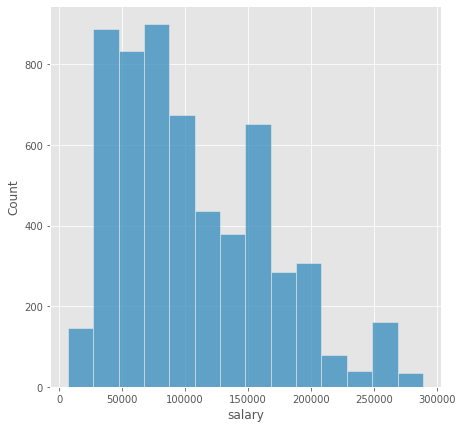

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.histplot(x=norm_dist,bins=bin_count)
plt.show()

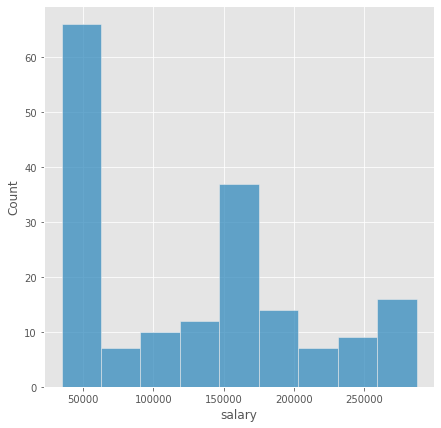

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.histplot(x=norm_dist_tl,bins=bin_count_tl)
plt.show()

# Описательная статистика

In [ ]:
new_df.describe()

,area_name,experience,salary,schedule_id
count,5812.000000,5812.000000,5812.000000,5812.000000
mean,3.940640,1.438403,104869.823813,1.324845
std,2.248636,0.554537,58810.056526,0.624831
min,1.000000,1.000000,7000.000000,1.000000
25%,1.000000,1.000000,55000.000000,1.000000
50%,6.000000,1.000000,95700.000000,1.000000
75%,6.000000,2.000000,150000.000000,2.000000
max,6.000000,3.000000,288844.000000,5.000000


In [ ]:
df_teamlead.describe()

,salary,SQL
count,178.000000,178.000000
mean,126415.123596,0.247191
std,79910.831770,0.432596
min,34800.000000,0.000000
25%,39150.000000,0.000000
50%,130250.000000,0.000000
75%,178750.000000,0.000000
max,287100.000000,1.000000


Среднее значение

In [ ]:
round(new_df['salary'].mean(), 2)

104869.82

In [ ]:
round(new_df['salary'].median(), 2)

95700.0

In [ ]:
round(df_teamlead['salary'].mean(), 2)

126415.12

СКО

In [ ]:
round(new_df['salary'].std(), 2)

58810.06

In [ ]:
round(df_teamlead['salary'].std(), 2)

79910.83

Коэффициент ассимметрии

In [ ]:
round(new_df['salary'].skew(), 2)

0.76

In [ ]:
round(df_teamlead['salary'].skew(), 2)

0.33

Коэффициент эксцесса

In [ ]:
round(new_df['salary'].kurt(), 2)

-0.07

In [ ]:
round(df_teamlead['salary'].kurt(), 2)

-1.2

## Проверка нормальности

### Проверка нормальности по критерию Шапиро-Уилка

Для проверки нормальности по критерию Шапиро-Уилка количество значений выборки должно быть от 3 до 5000

Делаю выборку по городам ТОП-5 России по ИТ-вакансиям

In [ ]:
new_df_5_cities = new_df.query('area_name < 6')

In [ ]:
stats.shapiro(new_df_5_cities['salary'])

ShapiroResult(statistic=0.9695645570755005, pvalue=4.0689256164682536e-24)

In [ ]:
stats.shapiro(df_teamlead['salary'])

ShapiroResult(statistic=0.8772681951522827, pvalue=6.873988878108861e-11)

P-value значительно меньше 0.05, следовательно, нулевая гипотеза отклоняется. Данные не имеют нормального распределения

### Проверка нормальности по критерию согласия Пирсона

In [ ]:
stats.normaltest(new_df['salary'])

NormaltestResult(statistic=447.8019664142237, pvalue=5.768175963149024e-98)

In [ ]:
stats.normaltest(df_teamlead['salary'])

NormaltestResult(statistic=80.4334185615585, pvalue=3.4206219563207738e-18)

Также получаю значение p-value значительно меньше 0.05, следовательно, нулевая гипотеза отклоняется. Данные не имеют нормального распределения

# Анализ влияния категориальных признаков. Критерии сравнения групп

Так как количественные данные не имеют нормального распределения, то коэффициент Стьюдента и дисперсионный анализ использовать нельзя. Используем критерий Манна-Уитни (для колонки sql) и критерий Краскала-Уоллиса для независимых групп (для колонок experience, area_name и schedule_id)

## Критерий Манна-Уитни

In [ ]:
df_teamlead.groupby('SQL')[['salary']].mean()

,salary
SQL,
0,105328.776119
1,190632.636364


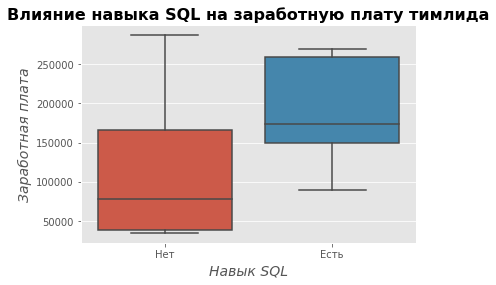

In [ ]:
sql_plot = sns.boxplot(x='SQL', y='salary', data=df_teamlead)
sql_plot.set_xticklabels(['Нет', 'Есть'])
plt.title('Влияние навыка SQL на заработную плату тимлида', fontsize=16, weight="bold")
plt.xlabel('Навык SQL', fontsize=14, fontstyle='italic')
plt.ylabel('Заработная плата', fontsize=14, fontstyle='italic')
plt.show()

In [ ]:
df_teamlead_0 = df_teamlead[df_teamlead['SQL']==0]
df_teamlead_1 = df_teamlead[df_teamlead['SQL']==1]
stats.mannwhitneyu(df_teamlead_0['salary'], df_teamlead_1['salary'])

MannwhitneyuResult(statistic=1175.5, pvalue=1.1327769235376544e-09)

Отклоняю нулевую гипотезу. Между группами существуют значительные различия.

## Критерий Краскала-Уоллиса

### Зарплата и опыт

In [ ]:
new_df.groupby('experience')[['salary']].mean()

,salary
experience,
1,86026.013074
2,130132.322536
3,158156.337079


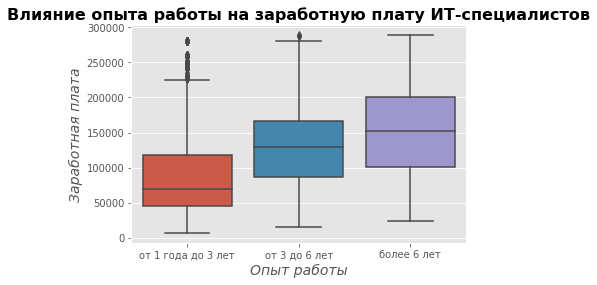

In [ ]:
experience_plot = sns.boxplot(x='experience', y='salary', data=new_df)
experience_plot.set_xticklabels(['от 1 года до 3 лет', 'от 3 до 6 лет', 'более 6 лет'])
plt.title('Влияние опыта работы на заработную плату ИТ-специалистов', fontsize=16, weight="bold")
plt.xlabel('Опыт работы', fontsize=14, fontstyle='italic')
plt.ylabel('Заработная плата', fontsize=14, fontstyle='italic')
plt.show()

In [ ]:
new_df_e1 = np.array(new_df[new_df['experience'] == 1]['salary'])
new_df_e2 = np.array(new_df[new_df['experience'] == 2]['salary'])
new_df_e3 = np.array(new_df[new_df['experience'] == 3]['salary'])

In [ ]:
stats.mstats.kruskalwallis(new_df_e1, new_df_e2, new_df_e3)

KruskalResult(statistic=960.6759539573587, pvalue=2.465285092703535e-209)

Отклоняю нулевую гипотезу. Между группами существуют значительные различия.

### Зарплата и город

In [ ]:
new_df.groupby('area_name')[['salary']].mean()

,salary
area_name,
1,139229.924953
2,122030.229226
3,106035.863636
4,108845.404145
5,99401.661765
6,82213.077208


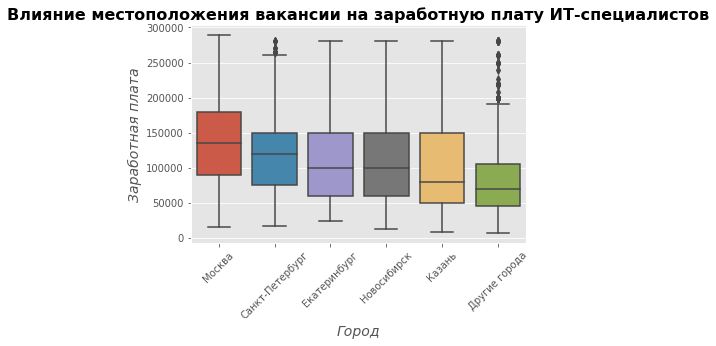

In [ ]:
city_plot = sns.boxplot(x='area_name', y='salary', data=new_df, order=new_df['area_name'].value_counts().sort_index(ascending=True).index)
city_plot.set_xticklabels(['Москва', 'Санкт-Петербург', 'Екатеринбург', 'Новосибирск', 'Казань', 'Другие города'], rotation=45)
plt.rcParams['figure.figsize'] = [7, 7]
plt.title('Влияние местоположения вакансии на заработную плату ИТ-специалистов', fontsize=16, weight="bold")
plt.xlabel('Город', fontsize=14, fontstyle='italic')
plt.ylabel('Заработная плата', fontsize=14, fontstyle='italic')
plt.show()

In [ ]:
new_df_a1 = np.array(new_df[new_df['area_name'] == 1]['salary'])
new_df_a2 = np.array(new_df[new_df['area_name'] == 2]['salary'])
new_df_a3 = np.array(new_df[new_df['area_name'] == 3]['salary'])
new_df_a4 = np.array(new_df[new_df['area_name'] == 4]['salary'])
new_df_a5 = np.array(new_df[new_df['area_name'] == 5]['salary'])
new_df_a6 = np.array(new_df[new_df['area_name'] == 6]['salary'])

In [ ]:
stats.mstats.mannwhitneyu(new_df_a3, new_df_a4)

MannwhitneyuResult(statistic=20662.5, pvalue=0.6388330984799376)

Между 3 и 4 группами значительных различий нет. 

p-value = 0.64

Объединяю эти две группы в одну. 

Снова провожу анализ по критерию Краскала-Уоллиса

In [ ]:
new_df_a34 = np.append(new_df_a3, new_df_a4)

In [ ]:
stats.mstats.kruskalwallis(new_df_a1, new_df_a2, new_df_a34, new_df_a5, new_df_a6)

KruskalResult(statistic=1086.6181276770985, pvalue=6.021673071990097e-234)

Отклоняю нулевую гипотезу. Имеются значительные различия между группами

In [ ]:
new_df.area_name = new_df.area_name.astype('int').astype('str')

In [ ]:
new_df.loc[new_df.area_name.str.contains('3'), 'area_name'] = '4'

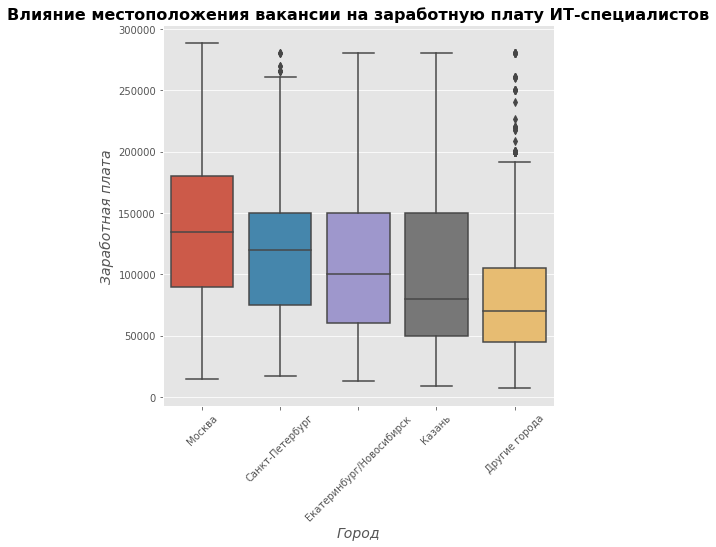

In [ ]:
city_plot = sns.boxplot(x='area_name', y='salary', data=new_df, order=new_df['area_name'].value_counts().sort_index(ascending=True).index)
city_plot.set_xticklabels(['Москва', 'Санкт-Петербург', 'Екатеринбург/Новосибирск', 'Казань', 'Другие города'], rotation=45)
plt.rcParams['figure.figsize'] = [7, 7]
plt.title('Влияние местоположения вакансии на заработную плату ИТ-специалистов', fontsize=16, weight="bold")
plt.xlabel('Город', fontsize=14, fontstyle='italic')
plt.ylabel('Заработная плата', fontsize=14, fontstyle='italic')
plt.show()

### Зарплата и график работы

In [ ]:
new_df.groupby('schedule_id')[['salary']].mean()

,salary
schedule_id,
1,95928.671037
2,133889.678241
3,119919.052356
4,101750.000000
5,57416.666667


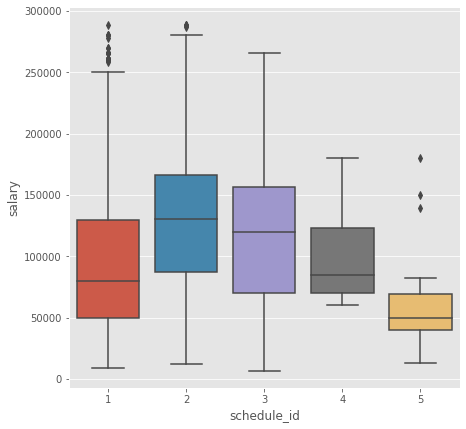

In [ ]:
sns.boxplot(x='schedule_id', y='salary', data=new_df)
plt.show()

In [ ]:
new_df_sc1 = np.array(new_df[new_df['schedule_id'] == 1]['salary'])
new_df_sc2 = np.array(new_df[new_df['schedule_id'] == 2]['salary'])
new_df_sc3 = np.array(new_df[new_df['schedule_id'] == 3]['salary'])
new_df_sc4 = np.array(new_df[new_df['schedule_id'] == 4]['salary'])
new_df_sc5 = np.array(new_df[new_df['schedule_id'] == 5]['salary'])

In [ ]:
stats.mstats.kruskalwallis(new_df_sc1, new_df_sc2, new_df_sc3, new_df_sc4, new_df_sc5)

KruskalResult(statistic=462.04385951885297, pvalue=1.081383506665391e-98)

Также отклоняю нулевую гипотезу. Имеются значительные различия между группами

## Критерий Хи-квадрат

Анализ качественных признаков не показал существенных связей между рассматриваемыми группами

### Город и зарплата

In [ ]:
arsal = pd.crosstab(new_df['area_name'], new_df['salary'])
arsal

salary,7000.0,8700.0,11310.0,12000.0,13050.0,15000.0,15747.0,16000.0,17400.0,17487.0,...,258390.0,260000.0,261000.0,265604.0,270000.0,277739.0,280000.0,287100.0,288154.0,288844.0
area_name,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,1,0,1,0,0,...,1,2,16,9,3,1,5,1,1,3
2,0,0,0,0,0,0,0,0,1,0,...,0,1,5,5,2,0,3,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,4,1,1,0,3,0,0,0
5,0,1,0,0,1,0,0,0,0,0,...,0,0,2,1,0,0,1,0,0,0
6,1,0,1,2,0,2,1,0,8,1,...,0,1,6,0,0,0,11,0,0,0


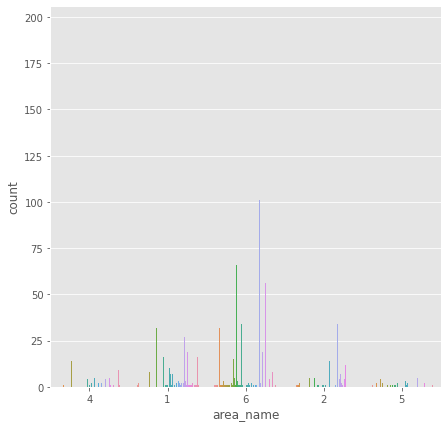

In [ ]:
sns.countplot(x=new_df['area_name'], hue=new_df['salary'])
plt.legend([],[], frameon=False)
plt.show()

In [ ]:
chi2, prob, new_df, expected = scipy.stats.chi2_contingency(arsal)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, new_df, prob))

test Statistics: 2833.2475990336943
degrees of freedom: 1508
p-value: 8.932078094767464e-84



### Город и опыт работы

In [ ]:
ae = pd.crosstab(new_df['area_name'], new_df['experience'])
ae

experience,1,2,3
area_name,,,
1,779,747,73
2,388,283,27
4,228,166,19
5,86,48,2
6,1961,948,57


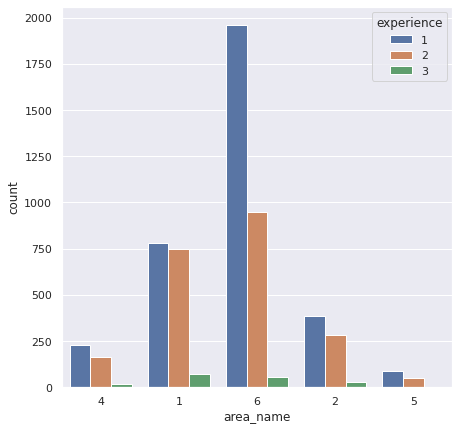

In [ ]:
sns.countplot(x=new_df['area_name'], hue=new_df['experience'])
plt.show()

In [ ]:
chi2, prob, df, expected = stats.chi2_contingency(ae)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format(chi2, df, prob))

test Statistics: 149.5794882435084
degrees of freedom: 8
p-value: 2.3995823216467663e-28



### Город и график работы

In [ ]:
asc = pd.crosstab(new_df['area_name'], new_df['schedule_id'])
asc

schedule_id,1,2,3,4,5
area_name,,,,,
1,1109,420,62,1,7
2,509,146,41,0,2
4,327,69,13,0,4
5,90,41,4,0,1
6,2236,620,71,5,34


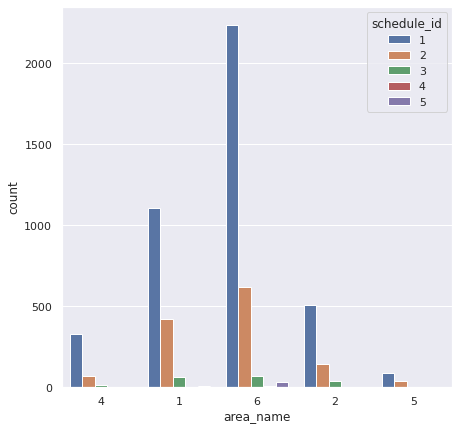

In [ ]:
sns.countplot(x=new_df['area_name'], hue=new_df['schedule_id'])
plt.show()

In [ ]:
chi2, prob, df, expected = stats.chi2_contingency(asc)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format(chi2, df, prob))

test Statistics: 67.16668275472212
degrees of freedom: 16
p-value: 3.1114411654878645e-08



### Опыт работы и график работы

In [ ]:
esc = pd.crosstab(new_df['experience'], new_df['schedule_id'])
esc

schedule_id,1,2,3,4,5
experience,,,,,
1,2673,618,109,3,39
2,1467,638,75,3,9
3,131,40,7,0,0


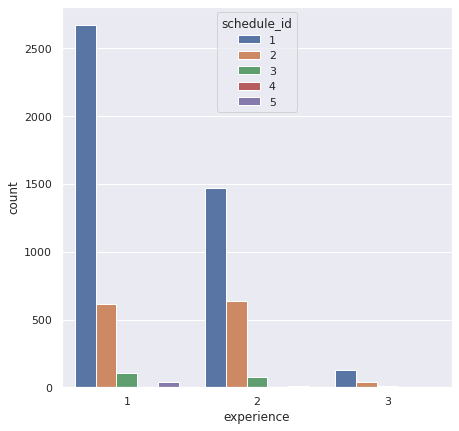

In [ ]:
sns.countplot(x=new_df['experience'], hue=new_df['schedule_id'])
plt.show()

In [ ]:
chi2, prob, df, expected = stats.chi2_contingency(esc)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format(chi2, df, prob))

test Statistics: 106.66303538485538
degrees of freedom: 8
p-value: 1.844450352371343e-19



# Анализ влияния количественных и порядковых признаков

## Ранговая корреляция

In [ ]:
new_df[['salary', 'experience']].corr(method='spearman') # ранговая корреляция коэффициент Спирмена

,salary,experience
salary,1.000000,0.406563
experience,0.406563,1.000000


In [ ]:
new_df[['salary', 'experience']].corr(method='kendall') # ранговая корреляция коэффициент Кендалла

,salary,experience
salary,1.000000,0.333343
experience,0.333343,1.000000


In [ ]:
stats.spearmanr(new_df.salary, new_df.experience)

SpearmanrResult(correlation=0.406562611743754, pvalue=2.9276767028241015e-230)

Исходя из результатов ранговой корреляции, можно сделать следующий вывод: 

*   Опыт работы значительно влияет на среднюю заработную плату ИТ-специалистов - чем выше опыт, тем выше средняя заработная плата

# Парная регресия

In [ ]:
results_teamlead = smf.ols('salary ~ SQL', data=df_teamlead).fit()
results_teamlead.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     47.71
Date:                Mon, 18 Jul 2022   Prob (F-statistic):           8.69e-11
Time:                        10:17:17   Log-Likelihood:                -2240.1
No. Observations:                 178   AIC:                             4484.
Df Residuals:                     176   BIC:                             4491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.053e+05   6140.472     17.153      0.000    9.32e+04    1.17e+05
SQL          8.53e+04   1.24e+04      6.907      0.000    6.09e+04     1.1e+05
==============================================================================
Omnibus:                       19.146   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.913
Skew:                           0.641   Prob(JB):                     0.000350
Kurtosis:                       2.290   Cond. No.                         2.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % (в этом случае коэффициент множественной корреляции превышает по модулю 70 %).

В моем случае уточненный коэффициент детерминации составляет ~ 20%.

То есть на 20% вариация средней заработной платы обусловлена знанием SQL (зависимой переменной p-value = 0.000), а на 80% - влиянием прочих факторов.

# Множественная регресия

In [ ]:
results = smf.ols('salary ~ experience', data=new_df).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     1057.
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          3.84e-213
Time:                        10:01:41   Log-Likelihood:                -71589.
No. Observations:                5812   AIC:                         1.432e+05
Df Residuals:                    5810   BIC:                         1.432e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.503e+04   1972.918     22.822      0.000    4.12e+04    4.89e+04
experience   4.16e+04   1279.804     32.509      0.000    3.91e+04    4.41e+04
==============================================================================
Omnibus:                      486.642   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              614.586
Skew:                           0.773   Prob(JB):                    3.50e-134
Kurtosis:                       3.387   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % (в этом случае коэффициент множественной корреляции превышает по модулю 70 %).

В моем случае уточненный коэффициент детерминации составляет ~ 30%.

То есть на 30% вариация средней заработной платы обусловлена опытом работы, местоположением и графиком работы (у всех зависимых переменных p-value = 0.000), а на 70% - влиянием прочих факторов.

# Выводы

Проанализировав исходные данные, я обнаружила три ключевых момента:

*   Опыт работы значительно влияет на среднюю заработную плату ИТ-специалистов - чем выше опыт, тем выше средняя заработная плата
*   Местоположение также значительно влияет на среднюю заработную плату ИТ-специалистов, но уже обратно пропорционально - чем меньше вакансий в городе, тем ниже средняя заработная плата
*   Знание SQL дает увеличение средней заработной платы для специальности Тимлид



# Комментарий от тьютора

Замечания по работе:

1. Обращаю Ваше внимание, что корреляционный анализ Спирмена и Пирсона, Кендалла проводится только для количественные и порядковых переменных, никак не для категориальных (населенный пункт, график работы, SQL) (исправила)
2. Неверно в модель множественной регрессии включены категориальные факторы experience, area_name, schedule_id - для того, чтобы их включить в модель необходимо ввести фиктивные переменные, которые в последующем включаются в модель как факторы (исправила)
3. Также хотелось отметить следующее, что при проверке гипотезы о том, что зарплата в регионах (городах) имеет статистически значимые отличия, возможно следующее: в городах, обозначенными 3 и 4 нет статистически значимых различий в средних (это можно проверить по критерию Манна-Уитни), если это окажется так, то желательно было бы их объединить в одну группу (исправила)

UPD: выполнено